# MUESTREO Y CUANTIZACION
SAMPLING DE IMAGENES, PROCESAMIENTO CON CV2

Autor: Serafini, Martin Nicolas

Abril 2025

El objetivo del código es realizar un muestreo de imágenes y procesarlas utilizando la biblioteca cv2, reduciendo la cantidad de valores de gris que utiliza y mostrar el resultado junto con el histograma de la distribucion de los valores de gris obtenidos en la imagen procesada.

In [13]:
# Instalo las bibliotecas requeridas
!pip install scikit-image watermark -q

In [14]:
# Importo las bibliotecas necesarias para el procesamiento de imágenes
import matplotlib.pyplot as plt
import numpy as np
import cv2
from cv2 import imread, cvtColor
from ipywidgets import interact, Checkbox, Dropdown, IntSlider
import re
import os
import urllib.request
import matplotlib.image as mpimg
import numpy as np

In [15]:
# Instalo la biblioteca watermark para mostrar información del entorno
%load_ext watermark
%watermark
%watermark --iversions

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2025-04-23T16:16:59.489161+00:00

Python implementation: CPython
Python version       : 3.11.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.123+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

cv2       : 4.11.0
re        : 2.2.1
matplotlib: 3.10.0
numpy     : 2.0.2
ipywidgets: 7.7.1



Los Simpsonms: https://cloudfront-eu-central-1.images.arcpublishing.com/prisaradio/G4HOEFMK4RPW3AVXMJJZ4ER5XA.jpg

Flores: https://www.cronista.com/files/image/686/686841/651dba96bedfb.jpg

In [16]:
# Pido al usuario que ingrese una URL
url = input("Ingrese la URL de la imagen: ")

# Verifico que la URL sea válida utilizando una expresión regular
pattern = re.compile(r'^(https?|ftp)://[^\s/$.?#].[^\s]*$')
if not pattern.match(url):
    print("Error: La URL ingresada no es válida.")
else:
    # Verifico si la URL corresponde a una imagen validando la extensión
    if not url.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        print("Error: La URL no corresponde a una imagen válida.")
    else:
        # Descargo la imagen utilizando wget
        os.system(f"wget {url}")

        # Extraigo el nombre del archivo de la URL para cargar la imagen
        nombre_imagen = url.split("/")[-1]

        # Cargo la imagen en la variable 'imagen'
        img = mpimg.imread(nombre_imagen)

        print("Imagen cargada exitosamente.")

Ingrese la URL de la imagen: https://cloudfront-eu-central-1.images.arcpublishing.com/prisaradio/G4HOEFMK4RPW3AVXMJJZ4ER5XA.jpg
Imagen cargada exitosamente.


In [17]:
# Defino una función llamada data_img que toma una imagen como argumento.
def data_img(img):
  print('Tamaño = ',img.shape)
  print('Max  = ',np.max(img))
  print('Min  = ',np.min(img))

In [18]:
def datos_imagen(img):
  alto,ancho = img.shape
  color_max = int(np.max(img))
  color_min = int(np.min(img))
  color_promedio = int(np.mean(img))
  return alto,ancho,color_max,color_min,color_promedio

In [19]:
# Lee la imagen usando imread y la guarda en la variable img
img = imread(nombre_imagen)

In [20]:
# Extraigo el canal azul de la imagen y lo guarda en la variable X, la imagen esta en el espacio BGR por eso esta invertido
X = img[:,:,0]

In [21]:
# Funcion para generar el histograma
def imhist(X,n=256):
  (N,M) = X.shape
# Creo un arreglo de ceros para almacenar el histograma
  h = np.zeros((n,))
# Itero sobre los píxeles de la imagen y actualiza el histograma
  for i in range(N):
    for j in range(M):
      x = X[i,j]
      h[x] = h[x]+1
  return h

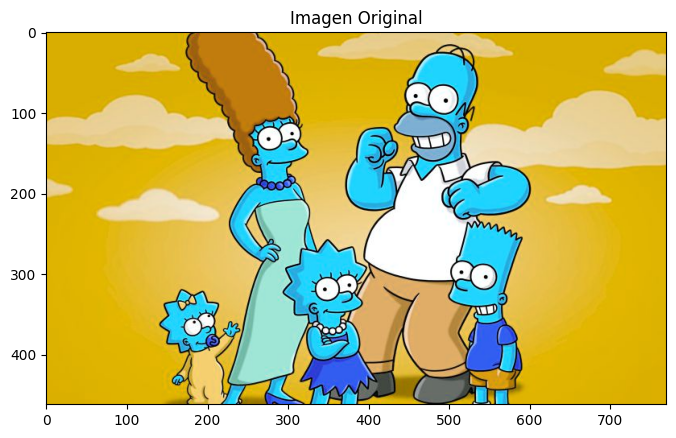

In [22]:
# Chequeo que la imagen se cargo correctamente, al haber usado cv2 se carga en formato BGR
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.title('Imagen Original')
plt.show()

##Comparativo Imagen Original, Procesada e Histograma



In [28]:
# Analisis combinado Muestreo y Cuantificacion
def procesar_imagen(canal=0, p=1, q=1, combinado=False):

  # Definición de nombres para los canales
  canales_nombres = ["Azul", "Verde", "Rojo"]

  # Selección del canal según el valor
  # Si "combinado" está activado, se toma el canal seleccionado con muestreo directamente
  # De lo contrario, se extrae el canal completo (sin muestreo)
  if combinado:
      if canal == 0:
        X = img[::p, ::p, 0]
      elif canal == 1:
        X = img[::p, ::p, 1]
      elif canal == 2:
        X = img[::p, ::p, 2]
  else:
      if canal == 0:
        X = img[:,:,0]
      elif canal == 1:
        X = img[:,:,1]
      elif canal == 2:
        X = img[:,:,2]

  # Convertir la imagen original completa a escala de grises
  img_gris_total = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Aplicar el muestreo a la imagen completa en escala de grises
  X_muestreada_gris = img_gris_total[::p, ::p]

  # Decido sobre qué imagen realizar la cuantificación
  # En modo combinado, se cuantifica sobre el canal seleccionado muestreado;
  # de lo contrario, se cuantifica sobre el canal seleccionado sin muestreo.
  if combinado:
    input_quant = X
  else:
    input_quant = X

  # Cuantificación por valor de q (aplicada sobre input_quant)
  (Nx, Mx) = input_quant.shape
  Y = np.zeros((Nx, Mx), np.uint8)
  for i in range(Nx):
    for j in range(Mx):
      x = int(np.fix(input_quant[i, j] / q) * q)
      Y[i, j] = x

  # Subplots: 2 filas x 3 columnas
  fig, axes = plt.subplots(2, 3, figsize=(16, 8))

  # Fila 0:
  # [0,0] - Imagen original en color (convertida a RGB para mostrarla correctamente)
  axes[0,0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # ← Aquí está el cambio
  axes[0,0].axis("off")
  axes[0,0].set_title('Imagen Original')


  # [0,1] - Imagen original completa en escala de grises
  axes[0,1].imshow(img_gris_total, cmap='gray')
  axes[0,1].axis("off")
  axes[0,1].set_title('Imagen Original - Escalas de grises')

  # [0,2] - Imagen original en escala de grises pero con muestreo (tomando 1 píxel cada p)
  axes[0,2].imshow(X_muestreada_gris, cmap='gray')
  axes[0,2].axis("off")
  axes[0,2].set_title(f'Muestreo (p={p})')

  # Fila 1:
  # [1,0] - Imagen del canal seleccionado (completo o muestreado según si esta activado "combinado")
  axes[1,0].imshow(X, cmap='gray')
  axes[1,0].axis("off")
  titulo_canal = f'Imagen Original - Canal {canales_nombres[canal]}'
  axes[1,0].set_title(titulo_canal)

  # [1,1] - Imagen cuantificada
  axes[1,1].imshow(Y, cmap='gray')
  axes[1,1].axis("off")
  if combinado:
    axes[1,1].set_title(f'Cuantificación sobre Muestreo (q={q})')
  else:
    axes[1,1].set_title(f'Cuantificación (q={q})')

  # [1,2] - Histograma del canal de color seleccionado de la imagen cuantificada
  n = 256
  h = imhist(Y, n=n)
  axes[1,2].plot(range(n), h[0:n])
  axes[1,2].set_title('Histograma')

  plt.show()

  # Imprimo tabla con los valores de las imagenes (tamaño y rangos de color)
  datos_muestra_original = datos_imagen(img_gris_total)
  datos_muestra = datos_imagen(X_muestreada_gris)
  datos_cuantificacion = datos_imagen(Y)
  datos_cuantificacion_original = datos_imagen(X)
  muestreo_titulo = f"Muestreo factor p={p}"
  cuantificacion_titulo = f"Cuantificación-Canal {canales_nombres[canal]}-q={q}"
  titulos=[muestreo_titulo,cuantificacion_titulo]
  muestreo_columnas = ['Imagen','Alto', 'Ancho','%']
  cuantificacion_columnas = ['Alto', 'Ancho','Minimo','Maximo', 'Promedio', 'Grises']
  filas = ["Original", "Procesada"]
  print(f"{titulos[0]:^36} | {titulos[1]:^48}")
  print(f"{muestreo_columnas[0]:^12}{muestreo_columnas[1]:^8}{muestreo_columnas[2]:^8}{muestreo_columnas[3]:^8} | {cuantificacion_columnas[0]:^8}{cuantificacion_columnas[1]:^8}{cuantificacion_columnas[2]:^8}{cuantificacion_columnas[3]:^8}{cuantificacion_columnas[4]:^8}{cuantificacion_columnas[5]:^8}")
  print(f"{filas[0]:<12}{datos_muestra_original[0]:^8}{datos_muestra_original[1]:^8}{datos_muestra_original[0]/datos_muestra_original[0]*100:^8.0f} | {datos_cuantificacion_original[0]:^8}{datos_cuantificacion_original[1]:^8}{datos_cuantificacion_original[2]:^8}{datos_cuantificacion_original[3]:^8}{datos_cuantificacion_original[4]:^8.1f}{256/1:^8.0f}")
  print(f"{filas[1]:<12}{datos_muestra[0]:^8}{datos_muestra[1]:^8}{datos_muestra[0]/datos_muestra_original[0]*100:^8.0f} | {datos_cuantificacion[0]:^8}{datos_cuantificacion[1]:^8}{datos_cuantificacion[2]:^8}{datos_cuantificacion[3]:^8}{datos_cuantificacion[4]:^8.1f}{256/q:^8.0f}")


  #print(datos_original, datos_muestra, datos_cuantificacion)


# Listas de valores para el menú interactivo
valor_p = [1, 2, 4, 8, 16, 32]
valor_q = [1, 2, 4, 8, 16, 32, 64, 128]
canal_color = [0, 1, 2]

# Llama a la función con interact, usando un Dropdown para los parámetros y un Checkbox para "combinado"
interact(procesar_imagen,
         canal=Dropdown(options=canal_color, description='Canal'),
         p=Dropdown(options=valor_p, description='Muestreo (p)'),
         q=Dropdown(options=valor_q, description='Cuantific. (q)'),
         combinado=Checkbox(value=False, description='Muestreo+Cuantificación'))



interactive(children=(Dropdown(description='Canal', options=(0, 1, 2), value=0), Dropdown(description='Muestre…

<function __main__.procesar_imagen(canal=0, p=1, q=1, combinado=False)>

##Conclusiones:
* Muestreo
  - ¿Cómo afecta a la calidad visual de la imagen?
    - Reduce los de detalles: Al aplicar muestreo, se toman menos píxeles de la imagen original. Con menos información espacial, se pierden detalles finos y texturas, lo que puede resultar en una imagen más pixelada.
    - Pérdida de definición: La disminución en la cantidad de datos implica que los bordes y contornos pueden volverse menos definidos, causando que la imagen se vea menos nítida.
    - Apariencia escalonada:Dependiendo del valor de p seleccionado y el tamaño orriginal de la imagen, la imagen muestreada puede presentar mostrarse mas pixelada, afectando la representación real de los grados de color.
  - ¿Cuánto se reduce el tamaño de la imagen con cada factor?
    - El factor de muestreo p hace que la nueva imagen tendrá 1/p del número de filas y 1/p del número de columnas de la imagen original.
    - Cuanto mayor es el factor p, más drásticamente disminuye la cantidad de píxeles y, por ende, el tamaño de la images muestreada.
  * ¿A partir de qué factor se hace notoria la pérdida de calidad?
    - No existiria una respuesta unica o exacta, el valor de p "ideal" varíara según la imagen a muestrear y el uso que se le quiera dar.

* Cuantificacion
  * ¿Cómo cambia la apariencia de la imagen?
    - Reducción de gradaciones: Al tener menos niveles de gris, las transiciones suaves se vuelven más abruptas. (el degradado dejara de ser tan continuo).
    - Pérdida de detalles sutiles: Las variaciones leves en la intensidad se agrupan, pudiendose perder detalles.
    - Contornos y bordes más definidos: En algunos casos, especialmente cuando se usan pocos niveles, los bordes entre diferentes zonas se vuelven más marcados.
  - ¿Qué sucede con el histograma en cada caso?
    - Histograma original: Generalmente un histograma de una imagen en escala de grises muestra una distribución con muchos niveles, abarcando desde 0 hasta 255 si la imagen utiliza el rango completo.
    - Histograma cuantificado: Aplicando cuantificación, la distribución de las intensidades se reduce a un número menor de picos.
      - Menos dispersión: La imagen tendrá píxeles concentrados en unos pocos valores discretos.
      - Barras o picos definidos: Cada pico corresponde a un rango de intensidades original agrupado en un solo nivel.
  - ¿En qué tipos de imágenes es más o menos notorio el efecto?
    - Imagenes con degrades suaves: En fotografías con transiciones de tonos muy suaves, la cuantificación es mas notable y puede generar un efecto de pixelizacion mas pronunciado.
    - Imágenes con alto contraste: En escenas con altos contrastes o con zonas sólidas de color (por ejemplo, gráficos, dibujos animados o imágenes con fondos uniformes), el efecto de cuantificación es menos evidente porque la imagen ya presenta cambios abruptos en la intensidad.
    - Imágenes con mucho ruido: En imágenes ruidosas, la cuantificación podría incluso ayudar a “limpiar” el ruido al agrupar niveles muy cercanos.

* Muestreo y Cuantificacion combinados
  - ¿Qué ocurre si combinamos muestreo y cuantización en una misma imagen?
  Al cuantificacion sobre la imagen muestreada, la imagen pierde tanto el tamaño (por el muestreo) como la suavidad en los gradientes de color (por cuantización).
  - ¿Qué proceso afecta más a la calidad percibida de la imagen?
  Esto dependera de cada caso, a priori la reducción producida por del muestreo tiende a afectar mas la calidad visual ya que el ojo es sensible a la pérdida de detalles y la nitidez, pero si el factor de cuantificacion es muy elevado (y por ejemplo pasamos de 256 a 4 niveles de gris), el efecto sera muy evidente.
  - ¿Qué proceso permite mayor compresión de datos?
  Tambien va a depender del caso. En principio el muestreo tiende a ser más efectivo porque elimina por grandes bloques de información que componian la imagen original, aunque la cuantización puede permitir una compresión mayor en cuanto a la representación de los valores de intensidad, ya que se reduce el número de bits por píxel.



##Analisis adicional: Comparacion los 3 canales de color en simultaneo

In [24]:
# Extra
# Comparacion Graficos mas histograma con distribucion de las escalas de grises - Muestra los 3 canales simultaneos

def procesar_imagen(q=1):
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # 3 filas, 3 columnas

    datos = []  # Lista para almacenar los datos de cada canal

    for canal in range(3):  # Iterar sobre los canales 0, 1, 2
        X_canal = img[:,:,canal].copy()  # Extraer el canal
        (Nx, Mx) = X_canal.shape
        Ny = Nx
        My = Mx
        Y = np.zeros((Ny, My), np.uint8)
        for i in range(Ny):
            for j in range(My):
                x = int(np.fix(X_canal[i, j] / q) * q)
                Y[i, j] = x

        # Mostrar imágenes y histograma en la fila correspondiente
        canales=['Azul','Verde','Rojo']
        axes[canal, 0].imshow(X_canal, cmap='gray')
        axes[canal, 0].axis("off")
        axes[canal, 0].set_title(f'Canal {canales[canal]} Original')
        axes[canal, 1].imshow(Y, cmap='gray')
        axes[canal, 1].axis("off")
        axes[canal, 1].set_title(f'Canal {canales[canal]} Procesada (q={q})')

        n = 256
        h = imhist(Y, n=n)
        axes[canal, 2].plot(range(n), h[0:n])
        axes[canal, 2].set_title(f'Histograma - Canal {canales[canal]}')

        datos.append(datos_imagen(Y))  # Almacenar los datos de cada canal

    plt.tight_layout()  # Ajustar el espaciado entre subplots
    plt.show()
    columnas = ["Canal","Maximo","Minimo","Promedio"]
    print(f"{columnas[0]:^12}{columnas[1]:^8}{columnas[2]:^8}{columnas[3]:^8}")
    for i in range(3):
        print(f"{canales[i]:<12}{datos[i][2]:^8}{datos[i][3]:^8}{datos[i][4]:^8.1f}")
# Lista con los valores de p para el menu desplegable
valor_q =[1,2,4,8,16,32,64,128]

# Llama a la funcion con el slider
interact(procesar_imagen, q=Dropdown(options=valor_q, description='Cuantif. (q)'))

interactive(children=(Dropdown(description='Cuantif. (q)', options=(1, 2, 4, 8, 16, 32, 64, 128), value=1), Ou…

<function __main__.procesar_imagen(q=1)>